# StackOverflow Query Workshop
<br/>

---

# Social Network Analysis

Our goal is to understand what we can say about the Stack Overflow R community on the basis of how we have interacted with Stack Overflow content.  Do some users always ask about the same tags?  This could reflect that that's a technology they use frequently, for example GIS.  Do the same users always answer the same tags?  Perhaps they're the maintainers, or the documentation isn't quite the best.

In either case, we learn about the community as a whole by seeing which users interact with each others' content.  


### First, let's construct the data set.

You can unfortunately only get back 50,000 results at a time, which is about 10 months worth of data.  So if you execute the query below, you'll have to paginate.  You can either do that, changing the months terms below, or you can use the master file I made.

Using this query:

```SQL 
SELECT 
--p.ViewCount, a.Id, a.Reputation, a.DisplayName as QuestionAsker, p.CreationDate as DateAsked, p.Id, p.Title, p.AnswerCount, p.Score as QuestionScore, b.Id, b.Reputation, b.DisplayName as Answerer, answer.CreationDate as DateAnswered, answer.Score as AnswerScore, t.TagName,
a.id,a.DisplayName as QuestionAsker,p.CreationDate,p.id,p.Title,b.id,b.DisplayName as Answerer,
case 
  WHEN ((p.AcceptedAnswerId = answer.Id)) THEN 'selected answer'
  ELSE 'attempted answer'
END as answertype
FROM Users a, Posts p, Users b, Posts answer, PostTags pt, Tags t
WHERE p.OwnerUserId = a.Id      -- or accountId?
  AND t.TagName in ('r')
  AND answer.OwnerUserId = b.Id -- or accountId
  AND p.PostTypeId = 1          -- question
  AND answer.PostTypeId = 2     -- answer
  AND Pt.PostId = p.id
  AND t.Id = pt.TagId
  AND answer.parentid = p.Id
  AND p.CreationDate >= '2018-01-01'
  AND p.CreationDate < '2019-01-01'
ORDER by p.CreationDate asc, answertype desc;

-- For answered questions
-- give me 
--   the question
--   the selected answer
--   the non-selected answers
--   the basic ids, scores of each, and their authors
-- for the language R
-- ordered by creation date
```

From:
https://data.stackexchange.com/stackoverflow/query/1092909/questions-and-answers-usernames-and-dates-for-r-tagged-questions

In [1]:
# you can download them each individually, changing the dates...
# url <- "https://data.stackexchange.com/stackoverflow/csv/1349398"
# fname <- "data/graphs/graph-2018.csv"
# download.file(url, fname)

# then concatenate them
files <- list.files("./data/graphs", full.names=T)
files

# Print the first line to confirm the files are good
lapply(files, function(x) {head(read.csv(x),1)})

df <- data.frame(do.call(rbind,
                         lapply(files,
                                function(x) read.csv(x,
#                                                     col.names=c('target', "QuestionAsker", "QReputation", "Asked", "PostId", "Title", "source", "Answerer", "AReputation","Answertype"),
                                                     col.names=c('target', "QuestionAsker", "Asked", "PostId", "Title", "source", "Answerer", "Answertype"),
                                                     stringsAsFactors = FALSE)
                                )
                         )
                 )

df <- df[!duplicated(df), ]
# write.csv(df, "./data/graph-master.csv")

[1] "./data/graphs/graph-2009.csv"       "./data/graphs/graph-2010.csv"      
 [3] "./data/graphs/graph-2011.csv"       "./data/graphs/graph-2012.csv"      
 [5] "./data/graphs/graph-2013.csv"       "./data/graphs/graph-2014.csv"      
 [7] "./data/graphs/graph-2015-12-17.csv" "./data/graphs/graph-2015.csv"      
 [9] "./data/graphs/graph-2016-12-02.csv" "./data/graphs/graph-2016.csv"      
[11] "./data/graphs/graph-2017-11-02.csv" "./data/graphs/graph-2017.csv"      
[13] "./data/graphs/graph-2018-10-16.csv" "./data/graphs/graph-2018.csv"      
[15] "./data/graphs/graph-2019.csv"

id,QuestionAsker,CreationDate,id.1,Title,id.2,Answerer,answertype
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",45914,jason,selected answer
id,QuestionAsker,CreationDate,id.1,Title,id.2,Answerer,answertype
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
25282,Christian,2010-01-01 23:19:03,1989995,Tutorial for R vectorised programming,143305,Dirk Eddelbuettel,selected answer
id,QuestionAsker,CreationDate,id.1,Title,id.2,Answerer,answertype
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
50065,BioGeek,2011-01-01 12:11:47,4574002,Pitfalls in R for Python programmers,72994,ramanujan,selected answer
id,QuestionAsker,CreationDate,id.1,Title,id.2,Answerer,answertype
<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>


Or skip all that and use the one I made...

In [1]:
df <- read.csv("data/graph-master.csv", stringsAsFactors=F)
head(df,10)



X,target,QuestionAsker,Asked,PostId,Title,source,Answerer,Answertype
<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",45914,jason,selected answer
2,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",45837,Anthony Rizk,attempted answer
3,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",81688,eleanorahowe,attempted answer
4,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",25188,John D. Cook,attempted answer
5,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",25571,yoyoyoyosef,attempted answer
6,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",1702,Yuval F,attempted answer
7,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",37751,JD Long,attempted answer
8,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",60617,f3lix,attempted answer
9,572,Thomas Owens,2009-01-07 13:27:28,420296,"What are some good books, web resources, and projects for learning R?",163809,Stedy,attempted answer


In [2]:
dim(df)

[1] 381446      9

In [66]:
# same for labels

# List of all names
#labels1 <- df[c("target","QuestionAsker", "QReputation")]
#labels2 <- df[c("source","Answerer", "AReputation")]
#colnames(labels1) <- c("id", "label", "reputation")
#colnames(labels2) <- c("id", "label", "reputation")
#labels <- unique(rbind(labels1,labels2))
#row.names(labels) <- NULL
# write.csv(labels,"data/label-master.csv")

labels <- read.csv("data/label-master.csv")
# rank labels

# Spotchecks
labels[labels$label %in% c("Dirk Eddelbuettel","Joshua Ulrich","Parfait"),]

# Notice this is whole-site reputation, not R-specific reputation



,X,id,label,reputation
,<int>,<int>,<fct>,<int>
53,53,143305,Dirk Eddelbuettel,290730
704,704,271616,Joshua Ulrich,144542
2441,2441,1052117,Mittenchops,7172
47303,47303,1422451,Parfait,60487


## Data munging

It helps to reformat the data as an edge list for easier import.  We'll do that, and save our labels which tie ids to answerers and askers for later use.

There are a couple of other items that can be helpful in graph analysis.  First, let's make a consistent direction that answerers point towards questions, that they direct attention to the questioners.  This is just convention---you could just as easily imagine a more tree-like model where one question points to many answerers.

Additionally, we'll remove self-loops, eg, here places where people answered their own questions.

Then, we'll run some basic social network analyses.

In [5]:
# load the premier network analysis package.
require("igraph")

In [27]:
# Makes edges that go from answerer to questioner
edges <- df[, c("source","target")]
edges$weight <- ifelse(df$"Answertype" == "selected answer", 2, 1) # 2 points for selected 1 for not.


# Remove self-loops
edges <- subset(edges, source!=target)

# Make graph
g <- graph.data.frame(edges, directed=TRUE)
g


IGRAPH e0e2d7f DNW- 98543 358150 -- 
+ attr: name (v/c), weight (e/n)
+ edges from e0e2d7f (vertex names):
 [1] 45914  ->572   45837  ->572   81688  ->572   25188  ->572   25571  ->572  
 [6] 1702   ->572   37751  ->572   60617  ->572   163809 ->572   236830 ->572  
[11] 706429 ->572   1447   ->37751 54904  ->37751 90567  ->37751 54904  ->37751
[16] 57626  ->11301 25188  ->11301 1409930->11301 58681  ->277   3768871->277  
[21] 148801 ->12677 28006  ->12677 45563  ->445   35308  ->445   20417  ->445  
[26] 611554 ->445   37751  ->10393 69117  ->10393 233984 ->10393 623824 ->10393
[31] 59084  ->10393 26575  ->12677 16632  ->63372 539416 ->63372 235524 ->63372
[36] 1201032->63372 3097865->63372 2292993->63372 41338  ->2056  19410  ->2056 
+ ... omitted several edges

In [45]:
SNAbasics <- function(X) {
    V(X)$label <- V(X)$name
    comps <- leading.eigenvector.community(g, options=list(naive=F))$membership
    V(X)$community <- comps
    # Infomap is a great community detection algorithm for smaller graphs:
    # imc <- infomap.community(X)
    # comps <- imc$membership
    RPageRank <- page.rank(X, vids=V(X), directed=TRUE, options=list(maxiter=10000,eps=0.0001))$vector
    V(X)$pageRank <- RPageRank*1000
    V(X)$evcent <- evcent(X)$vector
    V(X)$katz_size <- as.numeric(evcent(X)$vector*1000.0)
    V(X)$authority <- authority_score(X)$vector
    V(X)$power_centrality <- power_centrality(X, exponent=0.5, rescale=TRUE)  # try changing exponents
    V(X)$size <- (log(RPageRank*1000+1)+1)*1.5
    colbar <- rainbow(max(comps)+1);
    V(X)$color <- colbar[comps+1]
    V(X)$color <- paste0(substr(V(X)$color,1,7), "CC")  # Add transparency
    print(length(unique(comps)))
    return(X)
}

make_network <- function(df) {
  # Take it from the top.
  edges <- df[, c("source","target")]
  edges$weight <- ifelse(df$"Answertype" == "selected answer", 2, 1) # 2 points for selected 1 for not.
  dim(edges)

  labels <- read.csv("data/label-master.csv")

  edges <- subset(edges, source!=target)

  g <- graph.data.frame(edges, directed=TRUE)
  sg <- SNAbasics(g)
    
  # When you subset the graph and run start to finish, you'll want to uncommon this section
  #df2 <- as_data_frame(sg, what="vertices")
  #df3 <- merge(df2, labels, by.x = "name", by.y="id", all.x=T)
  #df3$label <- df3$label.y
  #df3$label.y <- NULL # this is redundant
  #df3$label.x <- NULL # this is redundant
  #df3$X <- NULL       # this is a row name
  #sg <- graph.data.frame(df3)

  return(sg)
}

sg <- make_network(df)
head(as_data_frame(sg, what="vertices"))

Warning message in leading.eigenvector.community(g, options = list(naive = F)):
“At community.c:1597 :This method was developed for undirected graphs”

[1] 1987


,name,label,community,pageRank,evcent,katz_size,authority,power_centrality,size,color
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
45914,45914,45914,1,0.007066914,2.328893e-07,0.0002328893,0.000000e+00,1.194195e-05,1.510563,#FF0100CC
45837,45837,45837,1,0.007066914,1.164446e-07,0.0001164446,0.000000e+00,1.194195e-05,1.510563,#FF0100CC
81688,81688,81688,1,0.007066914,1.164446e-07,0.0001164446,0.000000e+00,1.194195e-05,1.510563,#FF0100CC
25188,25188,25188,1,0.007066914,9.448148e-06,0.0094481482,0.000000e+00,1.609617e-03,1.510563,#FF0100CC
25571,25571,25571,1,0.009159438,2.487736e-05,0.0248773620,4.295795e-05,9.478925e-05,1.513677,#FF0100CC
1702,1702,1702,1,0.007252032,1.573332e-04,0.1573331689,5.076918e-04,1.194195e-05,1.510839,#FF0100CC


In [52]:
# for interpretability, let's merge the labels back on:
df2 <- as_data_frame(sg, what="vertices")

df3 <- merge(df2, labels, by.x = "name", by.y="id", all.x=T)
df3$label <- df3$label.y
df3$label.y <- NULL # this is redundant
df3$label.x <- NULL # this is redundant
df3$X <- NULL       # this is a row name
head(df3)

name,community,pageRank,evcent,katz_size,authority,power_centrality,size,color,reputation,label
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<fct>
10000067,1987,0.010073989,2.617240e-04,2.617240e-01,0.001004468,0.000000e+00,1.515035,#FF0001CC,16,Yoni
10000141,1,0.007066914,2.716236e-07,2.716236e-04,0.000000000,2.574984e-05,1.510563,#FF0100CC,1597,Joel
10000177,1987,0.021182899,7.755090e-04,7.755090e-01,0.002478912,0.000000e+00,1.531442,#FF0001CC,103,Paul Ibrahim
1000026,1,0.007237954,5.002698e-04,5.002698e-01,0.001717210,3.582586e-05,1.510818,#FF0100CC,397,David R
10000437,1,0.007066914,5.448858e-09,5.448858e-06,0.000000000,1.194195e-05,1.510563,#FF0100CC,48,merik
10000502,1987,0.007066914,2.013652e-05,2.013652e-02,0.000000000,2.388391e-05,1.510563,#FF0001CC,61,rockcop


In [53]:
# re order to keep reputation close to the other values
df3 <- df3[,c(11,1,2,3,4,5,6,7,10,8,9)]
head(df3)

label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
Yoni,10000067,1987,0.010073989,2.617240e-04,2.617240e-01,0.001004468,0.000000e+00,16,1.515035,#FF0001CC
Joel,10000141,1,0.007066914,2.716236e-07,2.716236e-04,0.000000000,2.574984e-05,1597,1.510563,#FF0100CC
Paul Ibrahim,10000177,1987,0.021182899,7.755090e-04,7.755090e-01,0.002478912,0.000000e+00,103,1.531442,#FF0001CC
David R,1000026,1,0.007237954,5.002698e-04,5.002698e-01,0.001717210,3.582586e-05,397,1.510818,#FF0100CC
merik,10000437,1,0.007066914,5.448858e-09,5.448858e-06,0.000000000,1.194195e-05,48,1.510563,#FF0100CC
rockcop,10000502,1987,0.007066914,2.013652e-05,2.013652e-02,0.000000000,2.388391e-05,61,1.510563,#FF0001CC


In [55]:
# Sort by Eigenvector Centrality as a measure of reputation
evc <- df3[order(df3$evcent, decreasing=T),]
head(evc, 100)

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
38975,akrun,3732271,1987,0.007066914,1.00000000,1000.00000,0.000000000,3.171532e-01,1,1.510563,#FF0001CC
49694,MAPK,4701887,1987,0.122539538,0.22667228,226.67228,1.000000000,1.194195e-05,2016,1.673390,#FF0001CC
37829,Sebastian Zeki,3632206,1987,0.245803373,0.21928389,219.28389,0.964194296,0.000000e+00,2781,1.829671,#FF0001CC
30481,Neil,2927983,1987,0.128243515,0.20215350,202.15350,0.901995464,2.985488e-05,2629,1.680993,#FF0001CC
75406,rnorouzian,7223434,1987,0.111263415,0.18529081,185.29081,0.804140518,-2.578620e-03,2426,1.658246,#FF0001CC
19422,42-,1855677,1,0.009522211,0.17518437,175.18437,0.031641372,4.805872e-02,220683,1.514216,#FF0100CC
38,Tyler Rinker,1000343,1,0.610078062,0.14742209,147.42209,0.445760056,-4.901495e-03,67492,2.214424,#FF0100CC
74002,MYaseen208,707145,1,0.298123368,0.14444657,144.44657,0.584386974,3.217314e-03,8257,1.891379,#FF0100CC
55132,G. Grothendieck,516548,1,0.007066914,0.13646314,136.46314,0.000000000,-1.214871e-01,163789,1.510563,#FF0100CC


In [56]:
# Sort by pageRank as measure of reputation
pr <- df3[order(df3$pageRank, decreasing=T),]
head(pr,100)

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
71396,neversaint,67405,1,1.4444097,0.094886189,94.886189,0.392420688,7.165172e-05,19158,2.840706,#FF0100CC
14413,pdubois,1380929,1987,1.3511951,0.059651006,59.651006,0.254372814,4.776781e-05,2717,2.782386,#FF0001CC
26842,Tal Galili,256662,1,0.7319668,0.017364299,17.364299,0.040964010,-7.815251e-04,12114,2.323886,#FF0100CC
16292,Btibert3,155406,1,0.7134065,0.021180213,21.180213,0.068785234,-4.975588e-03,13879,2.307725,#FF0100CC
38,Tyler Rinker,1000343,1,0.6100781,0.147422092,147.422092,0.445760056,-4.901495e-03,67492,2.214424,#FF0100CC
39487,JD Long,37751,1,0.5804140,0.022868805,22.868805,0.055528606,1.164467e-03,37712,2.186530,#FF0100CC
91578,screechOwl,914308,1,0.5757539,0.054440526,54.440526,0.187362602,1.017276e-03,10938,2.182101,#FF0100CC
17793,Brandon Bertelsen,170352,1,0.5227248,0.040784682,40.784682,0.103292249,1.120356e-03,26401,2.130752,#FF0100CC
38179,Matt Bannert,366256,1,0.4423550,0.024044573,24.044573,0.068724302,5.153809e-03,14394,2.049416,#FF0100CC


In [57]:
# Sort by authority as a measure of reputation
auth <- df3[order(df3$authority, decreasing=T),]
head(auth,100)

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
49694,MAPK,4701887,1987,0.12253954,0.22667228,226.67228,1.0000000,1.194195e-05,2016,1.673390,#FF0001CC
37829,Sebastian Zeki,3632206,1987,0.24580337,0.21928389,219.28389,0.9641943,0.000000e+00,2781,1.829671,#FF0001CC
30481,Neil,2927983,1987,0.12824352,0.20215350,202.15350,0.9019955,2.985488e-05,2629,1.680993,#FF0001CC
75406,rnorouzian,7223434,1987,0.11126342,0.18529081,185.29081,0.8041405,-2.578620e-03,2426,1.658246,#FF0001CC
74002,MYaseen208,707145,1,0.29812337,0.14444657,144.44657,0.5843870,3.217314e-03,8257,1.891379,#FF0100CC
50748,giacomo,4796107,1987,0.10867365,0.12415104,124.15104,0.5443030,8.654555e-03,1821,1.654747,#FF0001CC
36957,Alexander,3555558,1987,0.10303847,0.11700320,117.00320,0.5125255,0.000000e+00,1554,1.647103,#FF0001CC
62865,nak5120,5893585,1987,0.16601287,0.11131758,111.31758,0.4866503,1.711289e-03,1656,1.730385,#FF0001CC
17108,Rilcon42,1634753,1987,0.16062007,0.10595474,105.95474,0.4585602,-7.808779e-04,3054,1.723432,#FF0001CC


In [58]:
# Sort by power centrality as a measure of reputation
powerc <- df3[order(df3$power_centrality, decreasing=T),]
head(powerc,100)

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
38975,akrun,3732271,1987,0.007066914,1.0000000000,1000.0000000,0.000000e+00,0.31715325,1,1.510563,#FF0001CC
47343,alistaire,4497050,1987,0.013185030,0.0431646179,43.1646179,5.456457e-06,0.11281832,33868,1.519648,#FF0001CC
47116,Charles,447708,1,0.007066914,0.0010669603,1.0669603,0.000000e+00,0.06354456,4039,1.510563,#FF0100CC
85874,Ralf Stubner,8416610,1,0.007442344,0.0075984956,7.5984956,1.885904e-06,0.06185749,17983,1.511122,#FF0100CC
40139,Wiktor Stribiżew,3832970,1987,0.007066914,0.0366304677,36.6304677,0.000000e+00,0.05721114,352653,1.510563,#FF0001CC
46226,Henrik Lindberg,4392229,1987,0.007066914,0.0001726215,0.1726215,0.000000e+00,0.05642110,346,1.510563,#FF0001CC
58438,Martin Morgan,547331,1,0.007066914,0.0199259638,19.9259638,0.000000e+00,0.05568735,39953,1.510563,#FF0100CC
15220,hrbrmstr,1457051,1,0.013143674,0.0480417029,48.0417029,2.330066e-05,0.05465548,63924,1.519587,#FF0100CC
63679,SymbolixAU,5977215,1987,0.008493942,0.0179442600,17.9442600,1.357655e-02,0.05275792,17449,1.512687,#FF0001CC


In [59]:
# Sort by ACTUAL reputation as a measure of reputation
rep <- df3[order(df3$reputation, decreasing=T),]
head(rep,100)

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
23719,Jon Skeet,22656,601,0.007066914,0.000000e+00,3.720420e-17,0.000000e+00,1.194195e-05,1125146,1.510563,#2FFF00CC
67032,VonC,6309,1,0.007066914,9.706770e-04,9.706770e-01,0.000000e+00,1.795241e-02,884914,1.510563,#FF0100CC
9761,Gordon Linoff,1144035,1,0.007066914,5.516515e-04,5.516515e-01,0.000000e+00,-1.370809e-03,846245,1.510563,#FF0100CC
226,Martijn Pieters,100297,1,0.007066914,9.729118e-05,9.729118e-02,0.000000e+00,5.879439e-03,753642,1.510563,#FF0100CC
19988,Quentin,19068,1,0.007066914,2.761009e-05,2.761009e-02,0.000000e+00,2.003773e-04,682023,1.510563,#FF0100CC
15527,paxdiablo,14860,1,0.007066914,1.422276e-06,1.422276e-03,0.000000e+00,2.985488e-05,663041,1.510563,#FF0100CC
95284,Alex Martelli,95810,1,0.007066914,3.490927e-05,3.490927e-02,0.000000e+00,-3.120467e-04,656767,1.510563,#FF0100CC
65897,Mark Byers,61974,1,0.007066914,4.647083e-05,4.647083e-02,0.000000e+00,7.972994e-04,619630,1.510563,#FF0100CC
21866,Ignacio Vazquez-Abrams,20862,1,0.007066914,2.462361e-05,2.462361e-02,0.000000e+00,1.252538e-04,610271,1.510563,#FF0100CC


## Analysis

So we can see the results of the different measures of reputation.  First, look around above, and see if any of the rankings more intuitive sense to you.  We'll explore them pairwise, then against the actual stack overflow reputation system next.

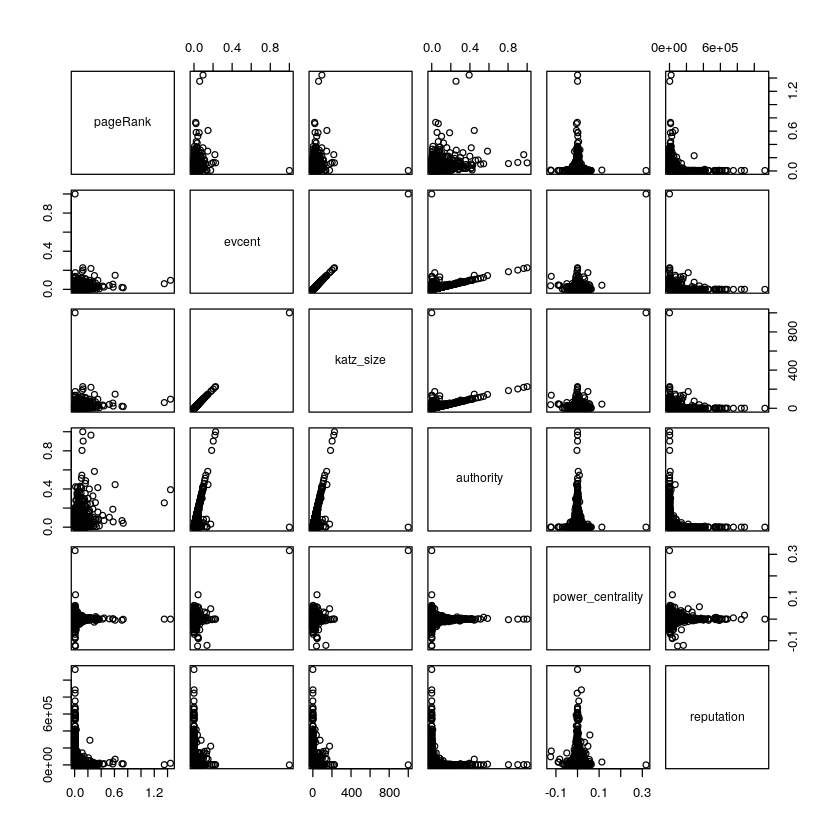

In [60]:
pairs(df3[4:9])
# You can see below that katz is derived from evcent

## So comparing this to actual reputation, computed with rank statistics

In [15]:
# Let's see correlations with kendall's tau, fyi, VERY SLOW TO RUN
# round(cor(df3[4:8], method="kendall", use = "complete.obs"),2)


In [61]:
# Let's see correlations using spearman's
round(cor(df3[4:9], method="spearman", use = "complete.obs"),2)


,pageRank,evcent,katz_size,authority,power_centrality,reputation
pageRank,1.00,0.34,0.34,0.52,-0.32,0.03
evcent,0.34,1.00,1.00,0.87,-0.19,0.24
katz_size,0.34,1.00,1.00,0.87,-0.19,0.24
authority,0.52,0.87,0.87,1.00,-0.30,0.07
power_centrality,-0.32,-0.19,-0.19,-0.30,1.00,0.19
reputation,0.03,0.24,0.24,0.07,0.19,1.00


As you can see, they're not close at all!  We can't easily back out reputation this way.  But notice something else above: the community numbers.  Namely, most of the weight of the communities are spread between two classes, the first and the last.

If you look for names you recognize, we may have picked up on something interesting---without even telling the algorithm that some R tags answer tidyverse questions and other users tend towards base R, we could imagine that users group towards which questions they answer.  Potentially, those who tend to answer tidy questions, appear to be in group 1987, while those who answer majority base R questions are in group 1.

Here is a plot of communities by membership counts:

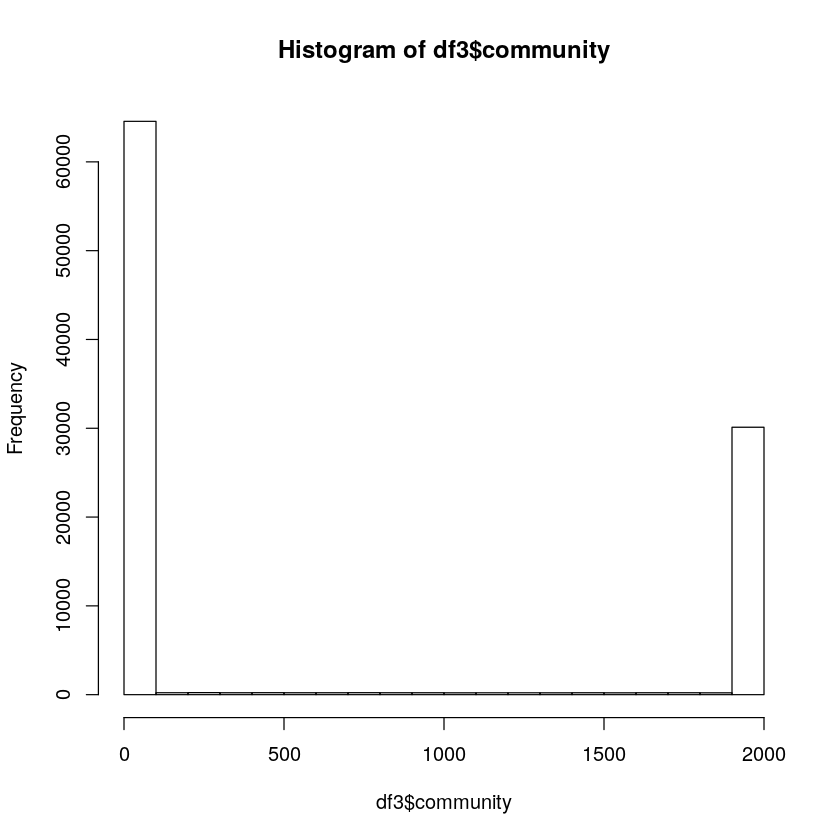

In [17]:
hist(df3$community)

## Really?

The challenge for you now is to test that claim.

- How robust is this to using a different community detection algorithm?  You'll notice these can vary dramatically.  How much?
- If you were to run a new query and check tags, is it supported by labels?  By Text?

In [62]:
# Bonus is some code for plotting
# This is very slow, so make sure you subset the graphs!
plotit <-function(g, name) {
  la <- layout_with_fr(g, grid="nogrid")
  #la <- layout_with_lgl(g, maxiter = 100, area = 4*vcount(g)^2)
  png(file=paste0("layout.", name,".fr.png"), bg = "white")
  plot(g,
     layout=la,
     edge.arrow.mode=0,
     displayisolates=FALSE,
     vertex.color=V(g)$color,
     vertex.label=NA,
     vertex.size=as.numeric(V(g)$evcent)*20,
     vertex.frame.color=NA,
     label.cex=0.16,
     arrowhead.cex = 0,
     edge.width=0.1,
     edge.color="#000000cc")
  dev.off()
}

In [77]:
# Here are two useful subgraphs, by time:
df_2009 <- df[(df$Asked < as.Date("2010-01-01")),]
df_2019 <- df[(df$Asked >= as.Date("2019-01-01")),]

# g_2009 <- make_network(df_2009)

# save to disk then render
# plotit2(g_2009,"2009")


Obligatory graph hairball:

<img src="layout.2009.fr.png" width=400pt>

## Modeling

There are a couple of other challenges in the data.  For instance, this user has an R score of 36,000, but a current reputation of 1 due to a temporary suspension:

https://stackoverflow.com/users/3732271/akrun

Data cleanliness like this certainly impacts the model.


# WORKSHOP

- Lookup your username.  What R community do you belong to?
- What additional data could improve a measure of authority over eigenvector centrality or PageRank?
- Can you make a better network graph of our communities?

In [75]:
look_me_up <- function(username) df3[df3$label %in% username,]
look_me_up("Parfait")

,label,name,community,pageRank,evcent,katz_size,authority,power_centrality,reputation,size,color
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>
14837,Parfait,1422451,1987,0.007073752,0.01844419,18.44419,0.0007961928,0.02663401,60487,1.510573,#FF0001CC
